<a href="https://colab.research.google.com/github/JewelEdu/audi_used_car_analysis/blob/main/audi_used_car_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import required libraries and Data Frame For Audi Car**

In [99]:
import numpy as np
import pandas as pd
#from google.colab import files
#uploaded = files.upload()
url = 'https://raw.githubusercontent.com/JewelEdu/audi_used_car_analysis/main/audi.csv'
#df = pd.read_csv("audi.csv")
df = pd.read_csv(url)
import matplotlib.pyplot as plt
import seaborn as sns
#df = pd.read_csv("audi.csv")
#print(type(df))
#display(df.head())
#display(df.tail())

# **Count the number of unique values present in the 'transmission' column**

In [100]:
print(df["transmission"].value_counts())

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64


# **Transmission values represented in Pie Chart** 

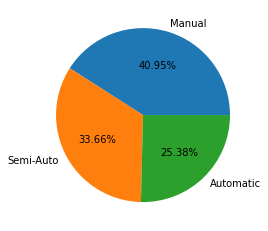

In [101]:
df["transmission"].value_counts().plot(kind="pie",autopct='%1.2f%%')                                  
plt.ylabel("")
plt.show()

# **Percentage of unique values present in the 'transmission' column**

In [102]:
df_transmission = pd.DataFrame(df["transmission"].value_counts())
df_transmission = df_transmission.reset_index()
df_transmission = df_transmission.rename(columns={"index":"transmission",
                                          "transmission":"Car_Number"})

df_transmission["% of cars"] = (df_transmission["Car_Number"]/df.shape[0])*100

df_transmission = df_transmission.round(2)

display(df_transmission)

,transmission,Car_Number,% of cars
0,Manual,4369,40.95
1,Semi-Auto,3591,33.66
2,Automatic,2708,25.38


# **Barplot for the 'transmission' column**

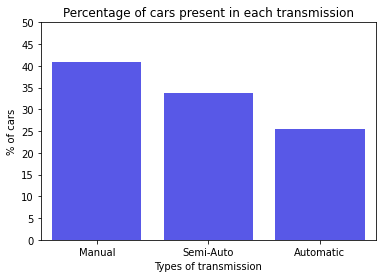

In [103]:
sns.barplot(x="transmission", 
            y="% of cars", 
            data=df_transmission, 
            color="Blue",
            alpha=0.75)

plt.xlabel("Types of transmission")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each transmission")

plt.yticks(np.arange(0,51,5))

plt.show()

# **Comparison:**

1. Here, in pie chart, manual transmission and semi-auto transmission are almost identical and difficult to compare at a glance although there is a difference of 7 percent or more between them.

2. In my opinion, I think bar charts are more efficient in this presentation. Because in Y-ticks we can easily observe, percentages and comparisons between variables

# **Load the dataset** ***For HW-3***

In [104]:
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


# **Statistics**

In [105]:
display(df.describe())


,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


# **Scatterplot** of **mileage** vs **price** &  **Scatterplot** of **mpg** vs **price**



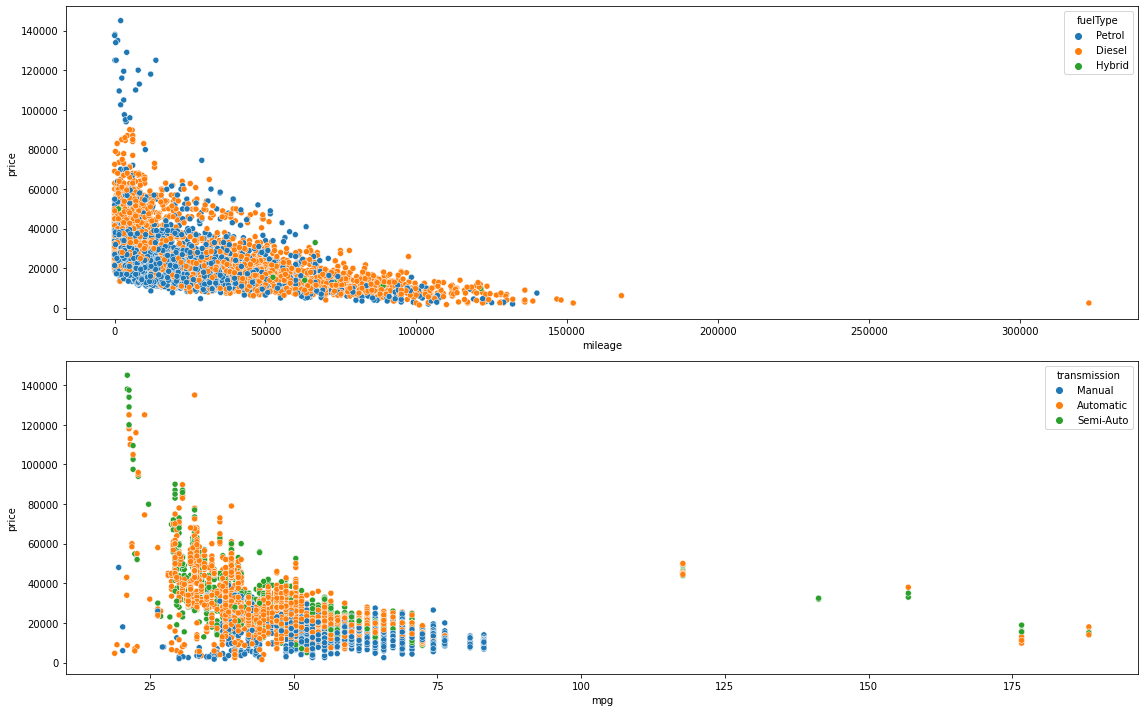

In [106]:
plt.figure(figsize=(16,10))

plt.subplot(2, 1, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue = "fuelType" ) #hue="model" )

plt.subplot(2, 1, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="transmission")

plt.tight_layout()
plt.show()

The first picture here shows that the mileage of petrol cars is less but the price is much higher. On the other hand the price of diesel cars is less but the mileage is much higher. Meanwhile, the hybrid cars are in line with the price and mileage.



# **Changing** **the** **hue** **parameter**

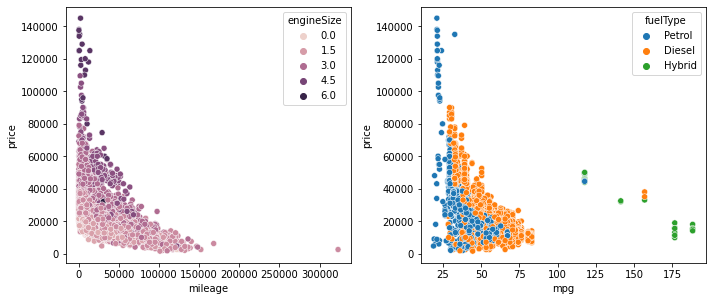

In [107]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="engineSize")

plt.subplot(2, 2, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="fuelType")

plt.tight_layout()
plt.show()

# **Regression** **plots**

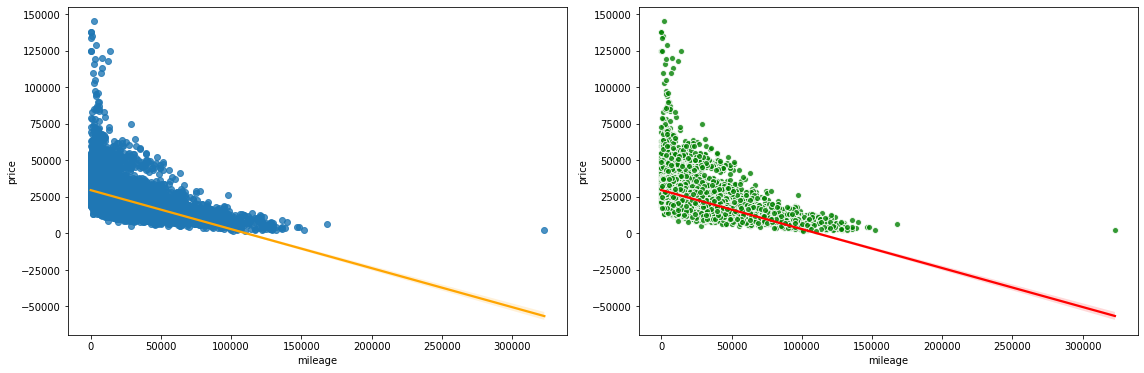

In [108]:
plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
sns.regplot(x="mileage", y="price", data=df, line_kws={"color":"orange"})

plt.subplot(2, 2, 2)
sns.regplot(x="mileage", y="price", data=df,
            scatter_kws={"color":"green","edgecolor":"white"},line_kws={"color":"red"})

plt.tight_layout()
plt.show()

## **Pairplot**

In [109]:
#sns.pairplot(df)
#plt.show()

# **Pairplot** **without** **redundancy** 

In [110]:
#sns.pairplot(df, corner=True)
#plt.show()

# **Categorical** **Feature**

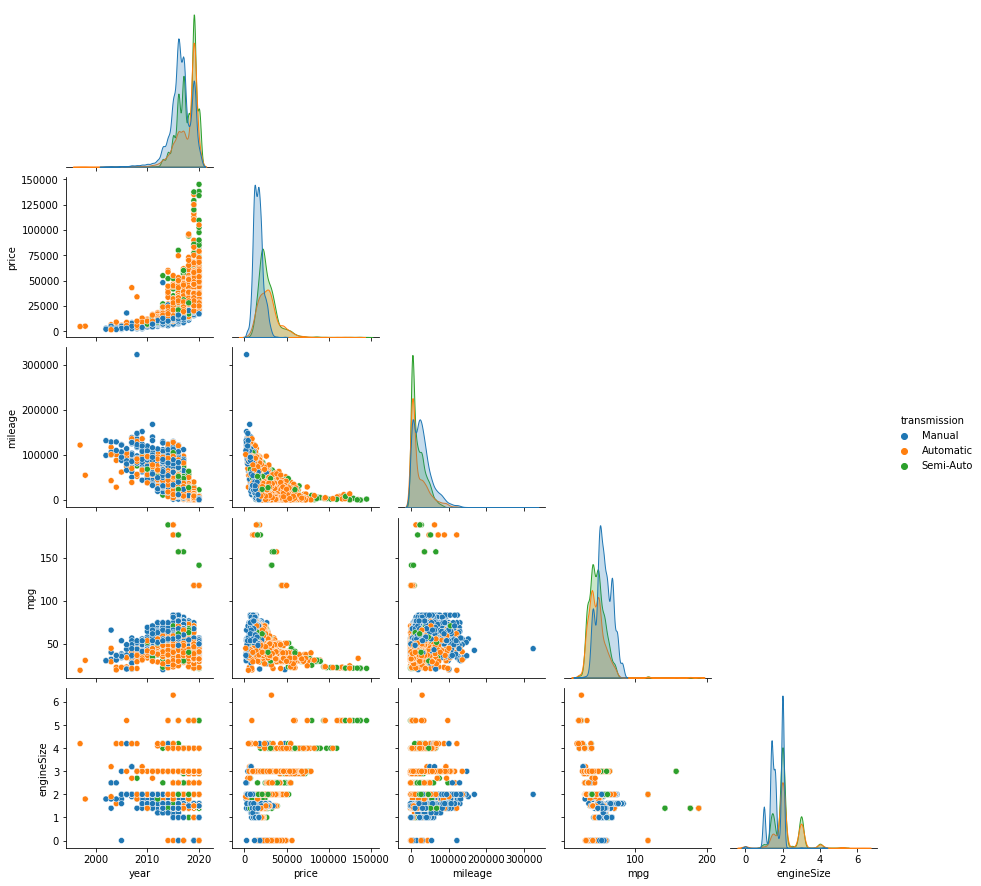

In [111]:
sns.pairplot(df, corner=True, hue="transmission")
plt.show()

# **Adding** **another** **categorical** **feature**

In [112]:
#sns.pairplot(df, hue = 'transmission', diag_kind = 'kde', 
#plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)
#plt.show()

## **Statistic**

In [113]:
display(df.describe())

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


**Boxplot**

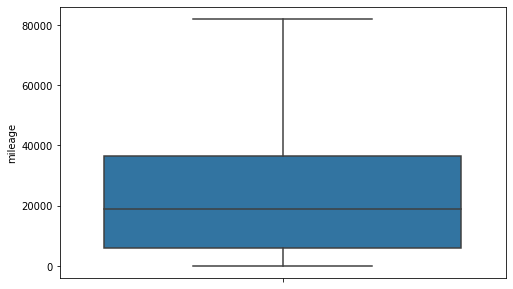

In [114]:
plt.figure(figsize=(8,5))# (figS=(tuples))is called list 
sns.boxplot(y = "mileage", data=df, showfliers=False)# 2.5>outliers>97.5
plt.show()


**Note:** here the maximum value is 323000 to remove outliers its shows 80000 and the minimum valu is 1. where the blue region is called IQR (inter-quartile range) = third quartile - first quartile. the first line of blue region is 1st quertile or 25% which is 5968.75 and the middle line is 2nd quartile or median which is 19000 and the heiest line is 3rd quartile, 36464.50.

**Remark:** "quarter is any one of four equal parts into which something has been divided while quartile is (statistics) any of the three points that divide an ordered distribution into four parts, each containing a quarter of the population." 

# **Drawback of Boxplot**


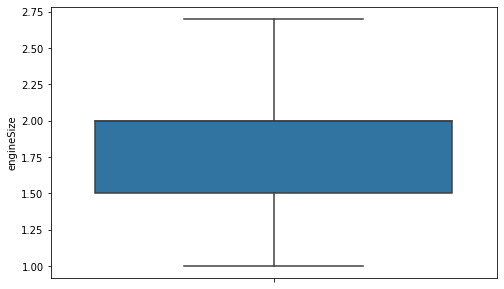

In [115]:
plt.figure(figsize=(8,5))# (figS=(tuples))is called list 
sns.boxplot(y = "engineSize", data=df, showfliers=False)# 2.5>outliers>97.5
plt.show()

**NOTE:** We cannot determine the average value from the box plot

# **For loop to show the boxplots of all numeric features**

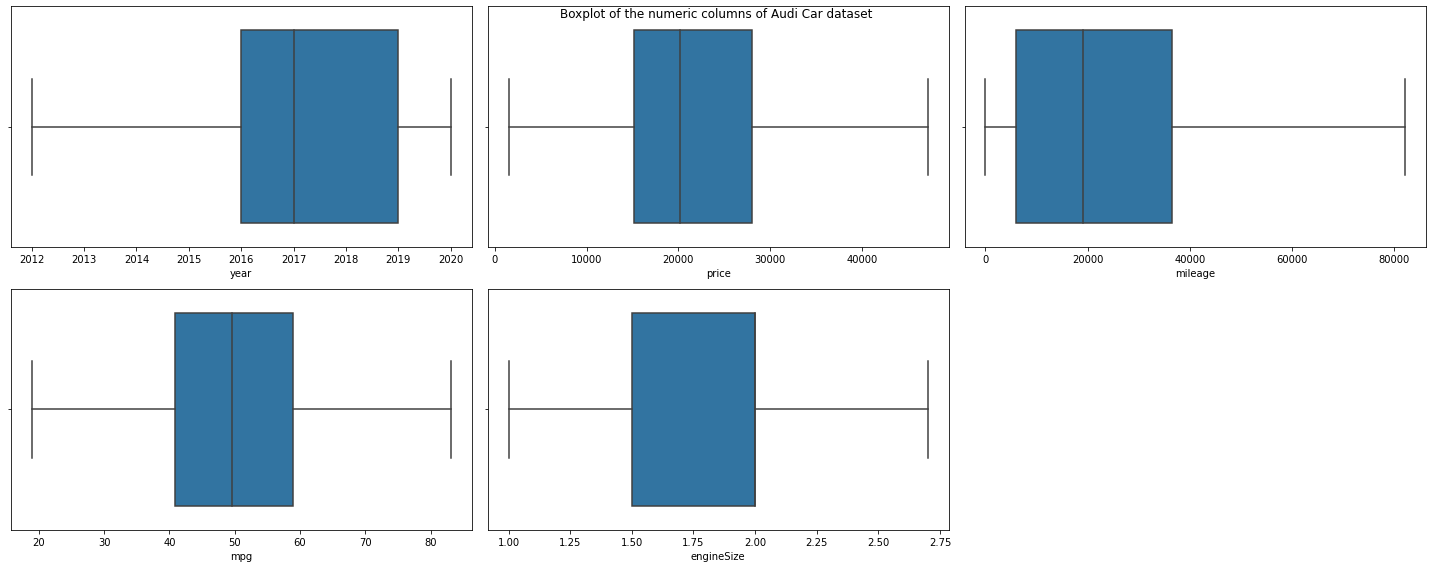

In [116]:
num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)
plt.figure(figsize=(20,8))

for index in range(len(num_cols)):
      
    plt.subplot(2,3,index+1)# index=0 that's why index+1
    sns.boxplot(x=num_cols[index], data=df, showfliers=False)# 2.5>outliers>97.5

plt.suptitle("Boxplot of the numeric columns of Audi Car dataset")
plt.tight_layout()
plt.show()

# **Adding categorical features in the boxplot**

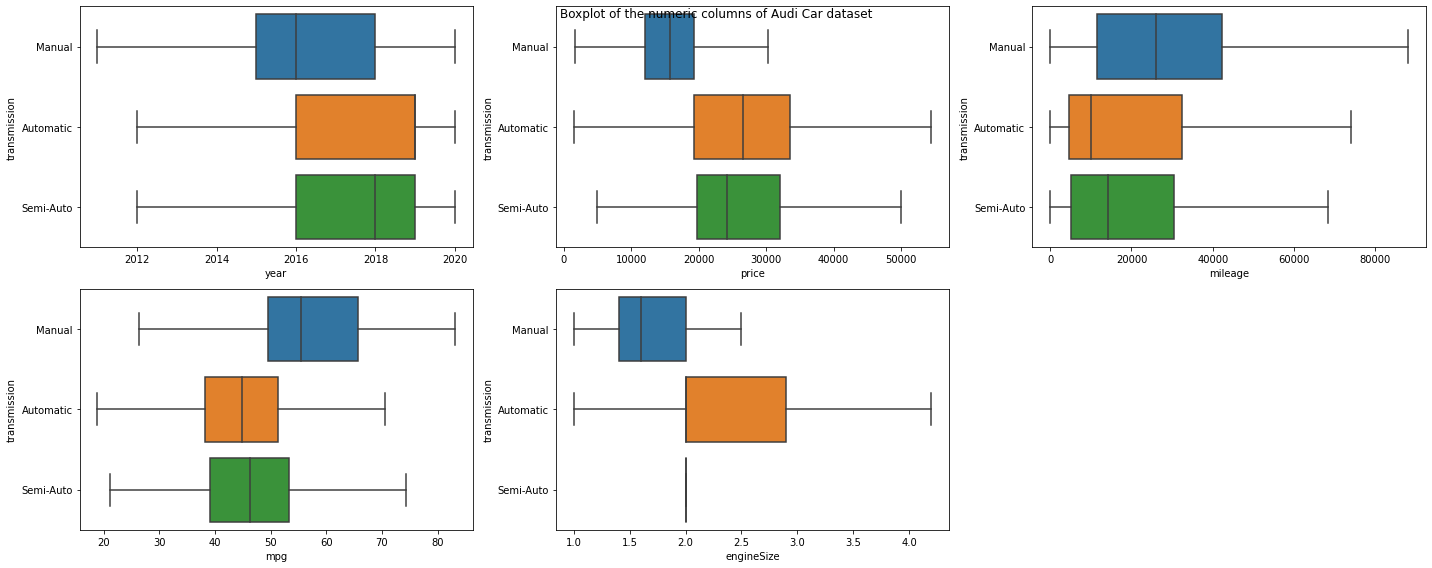

In [117]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=num_cols[index], data=df, showfliers=False, y=df["transmission"])

plt.suptitle("Boxplot of the numeric columns of Audi Car dataset")
plt.tight_layout()
plt.show()

 **NOTE:** Another drawback of the boxplot is that we cannot determine the amount of data perspective in the transmission here.

# **Another adding categorical features in the boxplot**

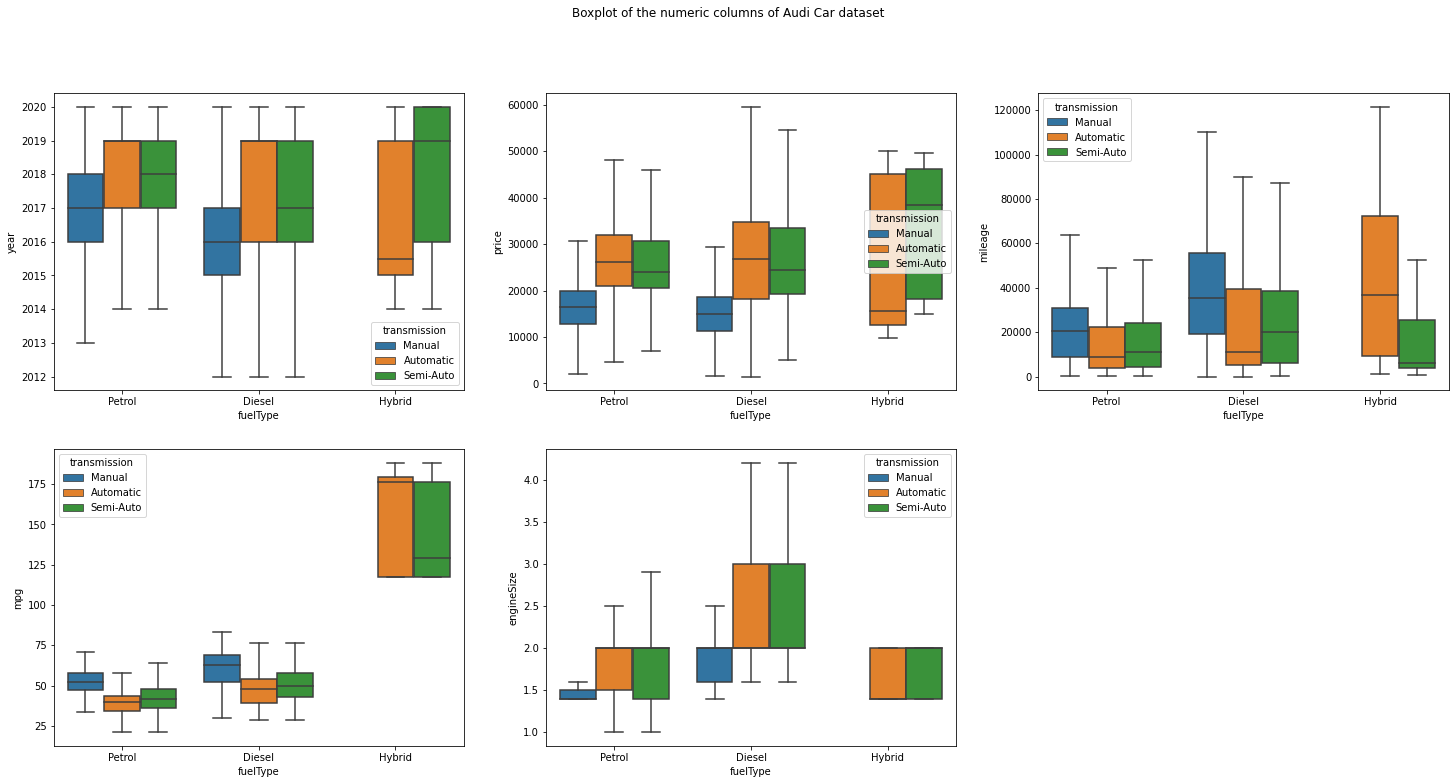

In [118]:
plt.figure(figsize=(25,12)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(y=df[num_cols[index]], x=df["fuelType"], hue=df["transmission"], showfliers=False)

plt.suptitle("Boxplot of the numeric columns of Audi Car dataset")
#plt.tight_layout()
plt.show()

**NOTE**: The most important information from these plots is that hybrid cars never have manual transmission. the engine sizes are small but have greater milage in automatic transmission though there is a drawback of the boxplot is that we cannot determine the amount of data perspective in the transmission.

# **Comparing boxplots and violinplot**

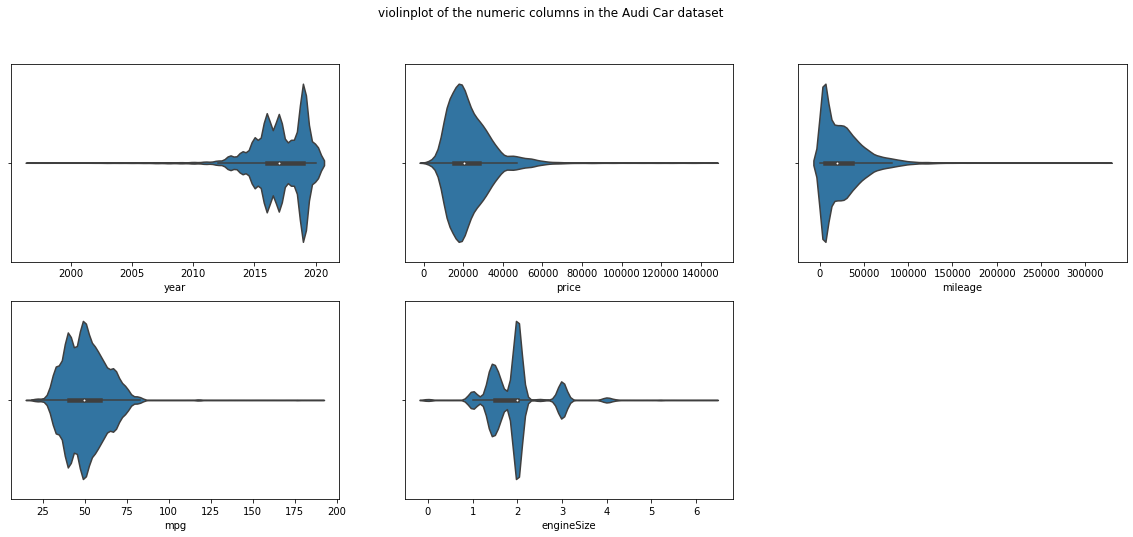

In [119]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("violinplot of the numeric columns in the Audi Car dataset")
# plt.tight_layout()
plt.show()



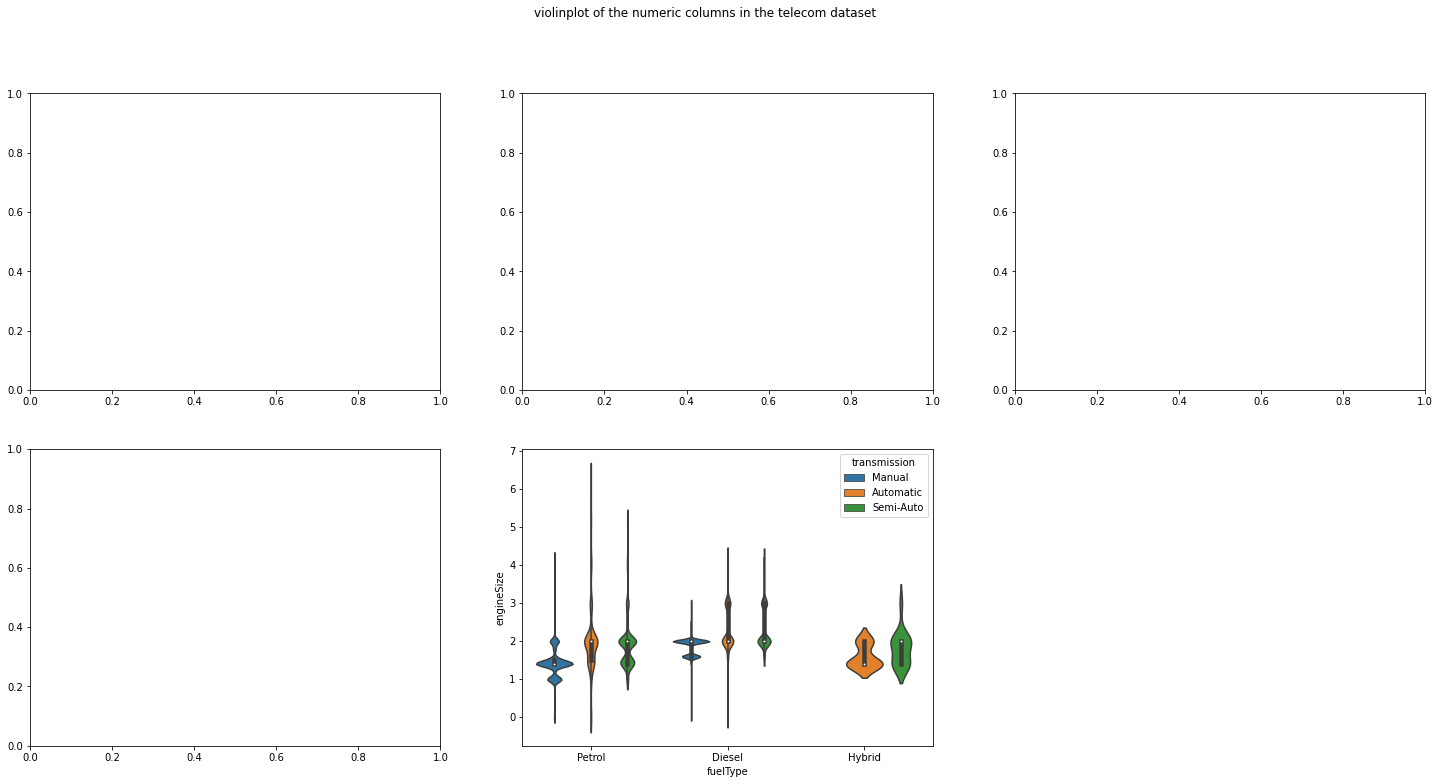

In [120]:
plt.figure(figsize=(25,12)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)

sns.violinplot(y=df[num_cols[index]], x=df["fuelType"], hue=df["transmission"], showfliers=False) # split=True)
plt.suptitle("violinplot of the numeric columns in the telecom dataset")
#plt.tight_layout()
plt.show()